In [8]:
import numpy as np

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

    def forward(self, X):
        self.hidden = np.dot(X, self.weights_input_hidden)
        self.hidden = self.sigmoid(self.hidden)
        self.output = np.dot(self.hidden, self.weights_hidden_output)
        self.output = self.sigmoid(self.output)
        return self.output

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backpropagate(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden)

        self.weights_hidden_output += self.hidden.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

# Define the genetic algorithm functions
def create_population(pop_size, input_size, hidden_size, output_size):
    return [NeuralNetwork(input_size, hidden_size, output_size) for _ in range(pop_size)]

def fitness(nn, X, y):
    output = nn.forward(X)
    return -np.mean((y - output) ** 2)

def select_parents(population, fitnesses, num_parents):
    parents = np.random.choice(population, size=num_parents, p=fitnesses/fitnesses.sum())
    return parents

def crossover(parent1, parent2):
    child = NeuralNetwork(parent1.input_size, parent1.hidden_size, parent1.output_size)
    child.weights_input_hidden = (parent1.weights_input_hidden + parent2.weights_input_hidden) / 2
    child.weights_hidden_output = (parent1.weights_hidden_output + parent2.weights_hidden_output) / 2
    return child

def mutate(nn, mutation_rate):
    if np.random.rand() < mutation_rate:
        nn.weights_input_hidden += np.random.randn(*nn.weights_input_hidden.shape) * 0.1
        nn.weights_hidden_output += np.random.randn(*nn.weights_hidden_output.shape) * 0.1

# Training the neural network using genetic algorithm
def train_genetic_algorithm(X, y, pop_size, num_generations, num_parents, mutation_rate):
    population = create_population(pop_size, X.shape[1], 5, y.shape[1])
    for generation in range(num_generations):
        fitnesses = np.array([fitness(nn, X, y) for nn in population])
        parents = select_parents(population, fitnesses, num_parents)
        new_population = []
        for _ in range(pop_size):
            parent1, parent2 = np.random.choice(parents, 2)
            child = crossover(parent1, parent2)
            mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population
        best_fitness = np.max(fitnesses)
        # print(f'Generation {generation}, Best Fitness: {best_fitness}')
    best_nn = population[np.argmax(fitnesses)]
    return best_nn



Trained Neural Network Output:


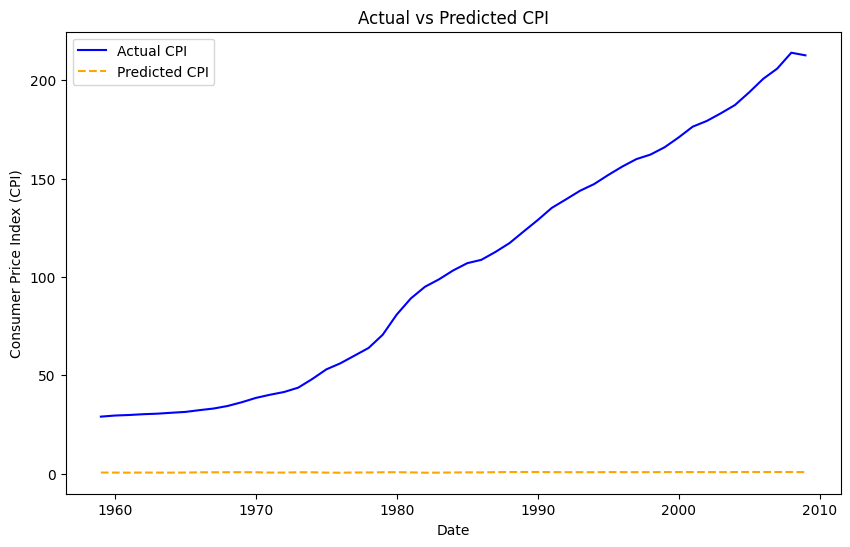

[[0.54611941]
 [0.53533365]
 [0.49123133]
 [0.55595284]
 [0.52524684]
 [0.52145097]
 [0.53662872]
 [0.67124945]
 [0.67875573]
 [0.70312379]
 [0.73840607]
 [0.69902822]
 [0.5367165 ]
 [0.53699287]
 [0.68194723]
 [0.69636575]
 [0.49995312]
 [0.46197048]
 [0.57980229]
 [0.59913615]
 [0.70238565]
 [0.73003565]
 [0.62948922]
 [0.47488678]
 [0.51319495]
 [0.58714569]
 [0.66524629]
 [0.63412868]
 [0.7648671 ]
 [0.80114829]
 [0.83046892]
 [0.83138219]
 [0.7617826 ]
 [0.74497979]
 [0.74006669]
 [0.73177841]
 [0.78008993]
 [0.77540827]
 [0.75080295]
 [0.75628662]
 [0.79184508]
 [0.79904975]
 [0.78796667]
 [0.79323619]
 [0.76189266]
 [0.79793538]
 [0.82360595]
 [0.81457256]
 [0.82815509]
 [0.8304983 ]
 [0.76715122]]


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm

df = sm.datasets.macrodata.load_pandas().data

def create_date(row):
    return pd.Timestamp(year=int(row['year']), month=int(row['quarter'] * 3 - 2), day=1)

df['date'] = df.apply(create_date, axis=1)

year = df.drop_duplicates("year")

X = year[['realgdp', 'realcons', 'realinv', 'realgovt',
    'realdpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint']].values  # Вхідні змінні
y = year['cpi'].values.reshape(-1, 1)  # Цільова змінна

# Нормалізуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_nn = train_genetic_algorithm(X_scaled, y, pop_size=20, num_generations=100, num_parents=10, mutation_rate=0.1)
print("Trained Neural Network Output:")

# Plotting the actual vs predicted values
predictions = best_nn.forward(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(year['date'], y, label='Actual CPI', color='blue')
plt.plot(year['date'], predictions, label='Predicted CPI', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.title('Actual vs Predicted CPI')
plt.legend()
plt.show()
print(best_nn.forward(X_scaled))


Training on window 1 (0-20)
Generation 0, Best Fitness: -1617.7011717952078
Generation 1, Best Fitness: -1621.505518384523
Generation 2, Best Fitness: -1625.5046885520046
Generation 3, Best Fitness: -1628.1067947928072
Generation 4, Best Fitness: -1631.9549856762762
Generation 5, Best Fitness: -1631.9549856762762
Generation 6, Best Fitness: -1630.8369646824635
Generation 7, Best Fitness: -1634.48325835139
Generation 8, Best Fitness: -1632.2749389991543
Generation 9, Best Fitness: -1634.812580807613
Generation 10, Best Fitness: -1632.5854631299214
Generation 11, Best Fitness: -1634.3743917602376
Generation 12, Best Fitness: -1635.1832904927478
Generation 13, Best Fitness: -1633.9223908926856
Generation 14, Best Fitness: -1633.8424717253106
Generation 15, Best Fitness: -1634.61863481868
Generation 16, Best Fitness: -1633.717159586609
Generation 17, Best Fitness: -1630.905652138208
Generation 18, Best Fitness: -1629.4983741510207
Generation 19, Best Fitness: -1634.4664547320383
Generation

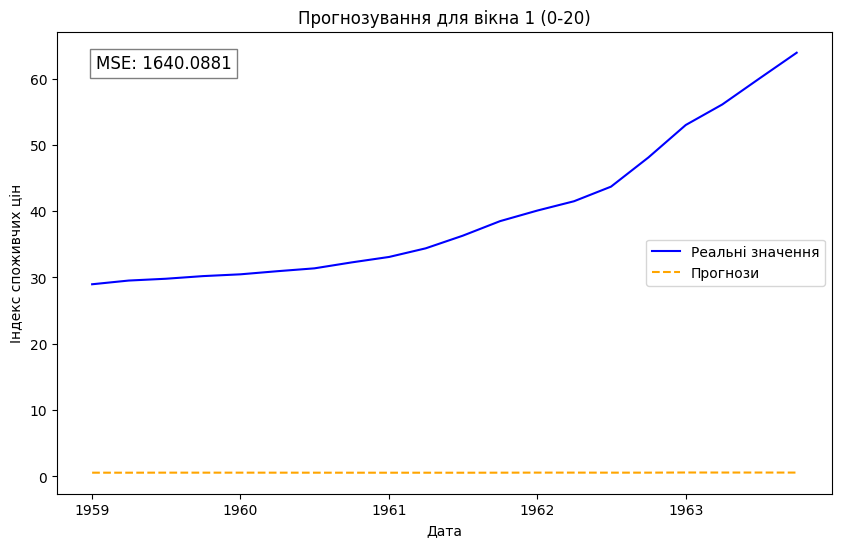

Training on window 2 (1-21)
Generation 0, Best Fitness: -1815.1654288425125
Generation 1, Best Fitness: -1825.554836424817
Generation 2, Best Fitness: -1830.0099813524753
Generation 3, Best Fitness: -1836.7640070061316
Generation 4, Best Fitness: -1845.3358079319873
Generation 5, Best Fitness: -1848.677302872479
Generation 6, Best Fitness: -1849.9756369467311
Generation 7, Best Fitness: -1850.1010616392414
Generation 8, Best Fitness: -1848.780197997993
Generation 9, Best Fitness: -1849.7029683717828
Generation 10, Best Fitness: -1849.9593796145982
Generation 11, Best Fitness: -1850.1383311604918
Generation 12, Best Fitness: -1849.7603565547652
Generation 13, Best Fitness: -1851.1046785654967
Generation 14, Best Fitness: -1851.2204064393359
Generation 15, Best Fitness: -1851.023275024166
Generation 16, Best Fitness: -1851.3186868222315
Generation 17, Best Fitness: -1848.0893705767335
Generation 18, Best Fitness: -1851.4289095651861
Generation 19, Best Fitness: -1851.5357457278915
Genera

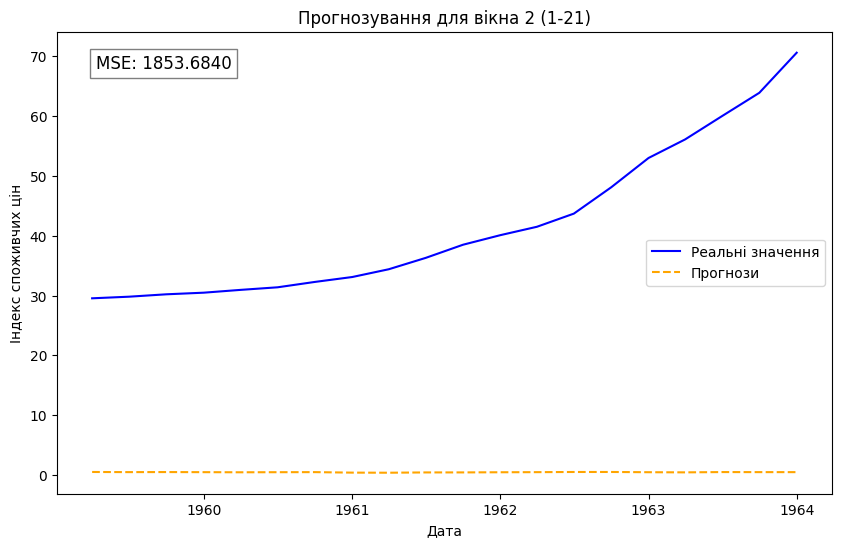

Training on window 3 (2-22)
Generation 0, Best Fitness: -2090.71817799823
Generation 1, Best Fitness: -2127.6139654664566
Generation 2, Best Fitness: -2134.6747005310726
Generation 3, Best Fitness: -2134.624478383017
Generation 4, Best Fitness: -2136.38949473335
Generation 5, Best Fitness: -2135.184490311664
Generation 6, Best Fitness: -2138.7402521978147
Generation 7, Best Fitness: -2140.9881852100098
Generation 8, Best Fitness: -2139.9034869635057
Generation 9, Best Fitness: -2141.3571292059305
Generation 10, Best Fitness: -2141.358586309145
Generation 11, Best Fitness: -2140.962506909303
Generation 12, Best Fitness: -2140.950216523223
Generation 13, Best Fitness: -2141.592014139123
Generation 14, Best Fitness: -2140.3334469529423
Generation 15, Best Fitness: -2140.1139295450566
Generation 16, Best Fitness: -2138.0882471334917
Generation 17, Best Fitness: -2138.912696179036
Generation 18, Best Fitness: -2139.6867035043674
Generation 19, Best Fitness: -2139.896920609711
Generation 20,

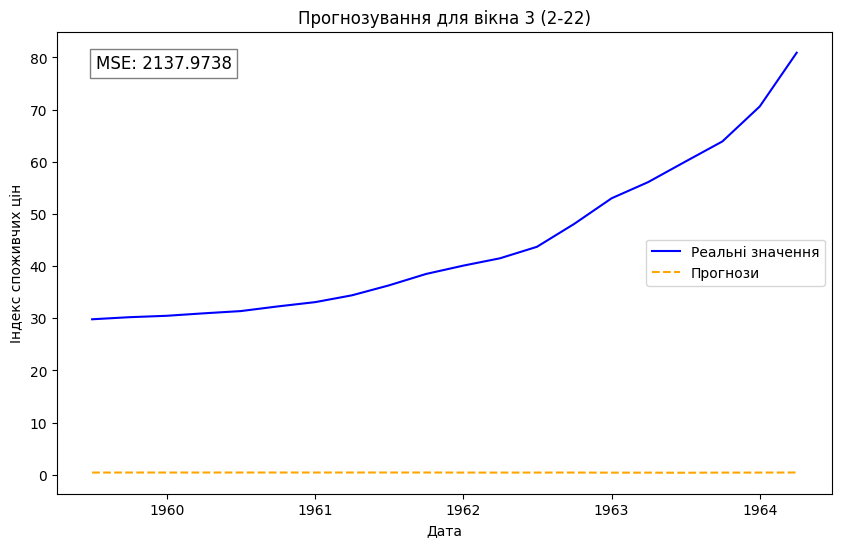

Training on window 4 (3-23)
Generation 0, Best Fitness: -2440.793692791324
Generation 1, Best Fitness: -2440.793692791324
Generation 2, Best Fitness: -2458.5014911434873
Generation 3, Best Fitness: -2458.5014911434873
Generation 4, Best Fitness: -2467.791900725991
Generation 5, Best Fitness: -2470.728934292312
Generation 6, Best Fitness: -2473.704687297318
Generation 7, Best Fitness: -2470.163228325072
Generation 8, Best Fitness: -2470.163228325072
Generation 9, Best Fitness: -2470.163228325072
Generation 10, Best Fitness: -2470.752343059913
Generation 11, Best Fitness: -2474.6867804370486
Generation 12, Best Fitness: -2474.6867804370486
Generation 13, Best Fitness: -2474.8536773443793
Generation 14, Best Fitness: -2474.919797957479
Generation 15, Best Fitness: -2474.4482021196213
Generation 16, Best Fitness: -2474.4482021196213
Generation 17, Best Fitness: -2471.6326928528856
Generation 18, Best Fitness: -2475.5116202254962
Generation 19, Best Fitness: -2475.614388509409
Generation 20

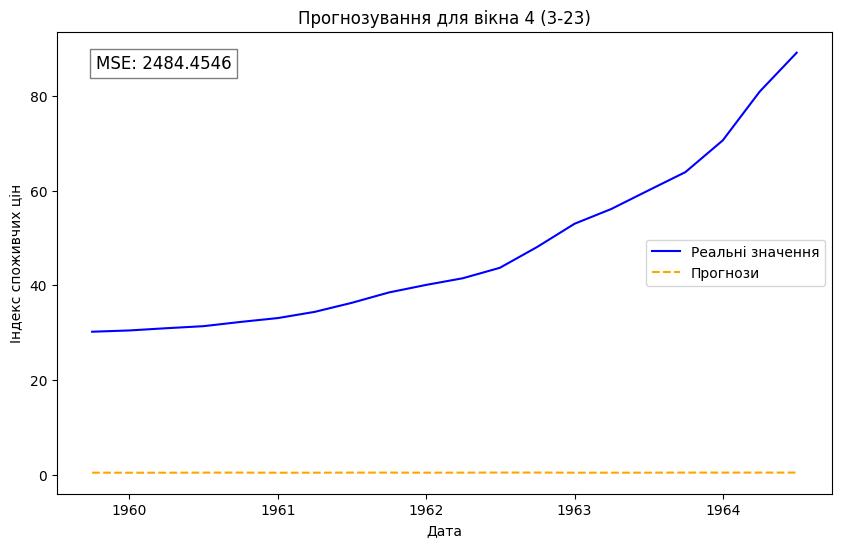

Training on window 5 (4-24)
Generation 0, Best Fitness: -2848.110341762326
Generation 1, Best Fitness: -2862.515343235656
Generation 2, Best Fitness: -2868.319102737466
Generation 3, Best Fitness: -2868.319102737466
Generation 4, Best Fitness: -2870.3098245310484
Generation 5, Best Fitness: -2878.14700597857
Generation 6, Best Fitness: -2881.5939207607557
Generation 7, Best Fitness: -2884.6828467625046
Generation 8, Best Fitness: -2885.4646715001595
Generation 9, Best Fitness: -2884.809480502493
Generation 10, Best Fitness: -2880.209051354391
Generation 11, Best Fitness: -2880.0305898375727
Generation 12, Best Fitness: -2882.6611166613
Generation 13, Best Fitness: -2882.6611166613
Generation 14, Best Fitness: -2880.824856620955
Generation 15, Best Fitness: -2884.238970000676
Generation 16, Best Fitness: -2884.4674533899724
Generation 17, Best Fitness: -2882.87298745679
Generation 18, Best Fitness: -2882.6630074210207
Generation 19, Best Fitness: -2883.3648724877253
Generation 20, Best 

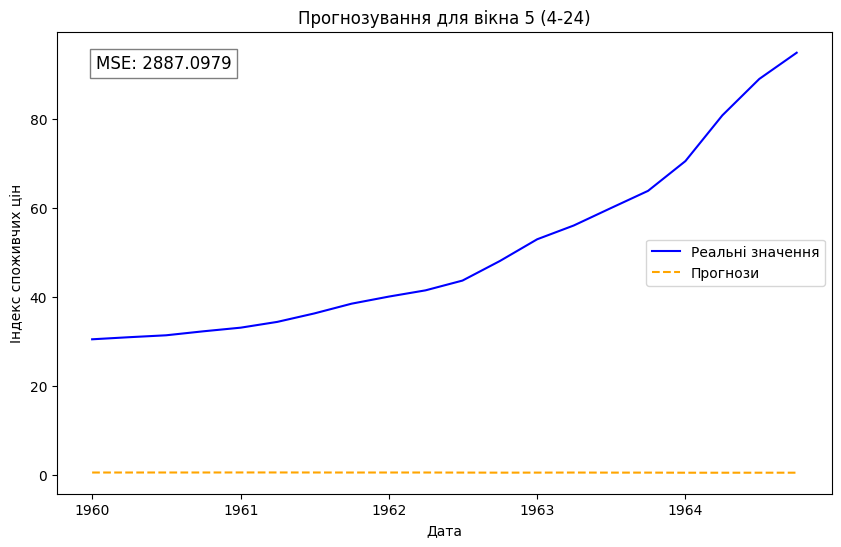

Training on window 6 (5-25)
Generation 0, Best Fitness: -3295.5378513354567
Generation 1, Best Fitness: -3300.418849022602
Generation 2, Best Fitness: -3300.731836849723
Generation 3, Best Fitness: -3307.0938856665175
Generation 4, Best Fitness: -3311.8035899201896
Generation 5, Best Fitness: -3314.7065778233664
Generation 6, Best Fitness: -3314.7065778233664
Generation 7, Best Fitness: -3316.5517288737765
Generation 8, Best Fitness: -3321.924639106596
Generation 9, Best Fitness: -3320.8802009931906
Generation 10, Best Fitness: -3322.1431176958586
Generation 11, Best Fitness: -3322.4980737392057
Generation 12, Best Fitness: -3322.6131081870417
Generation 13, Best Fitness: -3323.3143189991415
Generation 14, Best Fitness: -3324.503300885174
Generation 15, Best Fitness: -3321.2798549499917
Generation 16, Best Fitness: -3324.559873072102
Generation 17, Best Fitness: -3319.5752059941797
Generation 18, Best Fitness: -3324.600146594358
Generation 19, Best Fitness: -3324.6373773360597
Generati

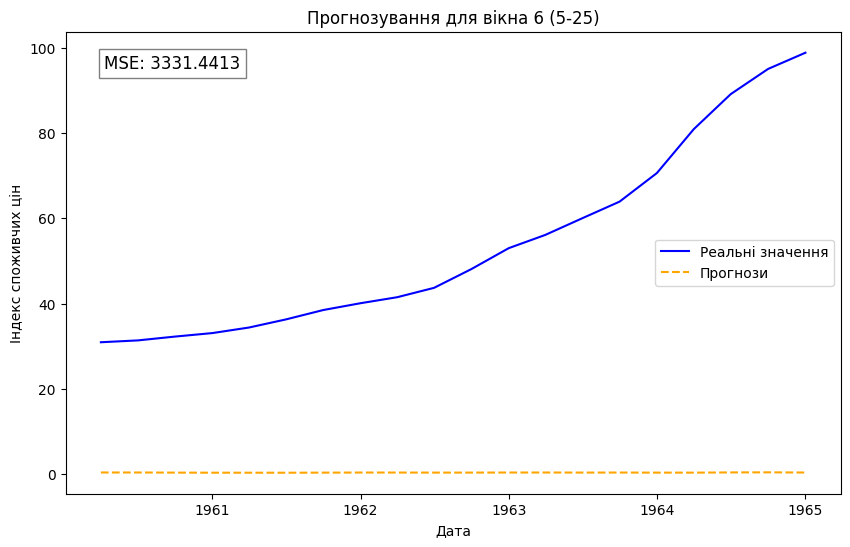

Training on window 7 (6-26)
Generation 0, Best Fitness: -3757.707682305703
Generation 1, Best Fitness: -3772.9643322982097
Generation 2, Best Fitness: -3773.587583842035
Generation 3, Best Fitness: -3777.582513939177
Generation 4, Best Fitness: -3777.582513939177
Generation 5, Best Fitness: -3777.582513939177
Generation 6, Best Fitness: -3779.8546751079202
Generation 7, Best Fitness: -3781.281043526405
Generation 8, Best Fitness: -3782.438623657169
Generation 9, Best Fitness: -3783.129867245077
Generation 10, Best Fitness: -3782.167456860544
Generation 11, Best Fitness: -3784.3392275458864
Generation 12, Best Fitness: -3784.952625850231
Generation 13, Best Fitness: -3785.303621932652
Generation 14, Best Fitness: -3780.5833721292247
Generation 15, Best Fitness: -3785.39656582234
Generation 16, Best Fitness: -3784.1987121294246
Generation 17, Best Fitness: -3784.1162593900017
Generation 18, Best Fitness: -3785.220924167844
Generation 19, Best Fitness: -3784.7991411677613
Generation 20, B

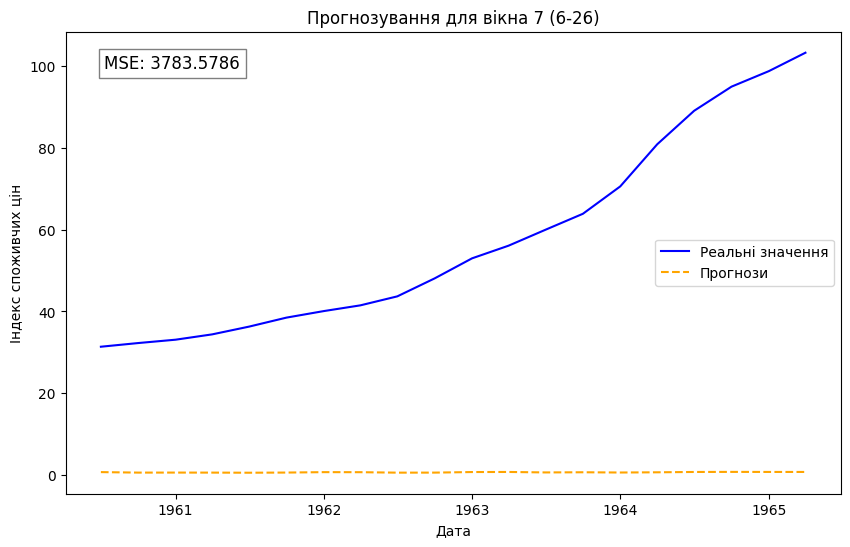

Training on window 8 (7-27)
Generation 0, Best Fitness: -4273.8500834030065
Generation 1, Best Fitness: -4274.95719658778
Generation 2, Best Fitness: -4296.364887170082
Generation 3, Best Fitness: -4336.981926543379
Generation 4, Best Fitness: -4350.694033574162
Generation 5, Best Fitness: -4354.407702663003
Generation 6, Best Fitness: -4355.767924298147
Generation 7, Best Fitness: -4355.767924298147
Generation 8, Best Fitness: -4352.6649088101085
Generation 9, Best Fitness: -4356.792298446906
Generation 10, Best Fitness: -4356.792298446906
Generation 11, Best Fitness: -4356.993803352978
Generation 12, Best Fitness: -4355.9693446950305
Generation 13, Best Fitness: -4352.665356673
Generation 14, Best Fitness: -4350.938583944292
Generation 15, Best Fitness: -4352.22076669481
Generation 16, Best Fitness: -4354.7600655396345
Generation 17, Best Fitness: -4355.405514105273
Generation 18, Best Fitness: -4355.904754390552
Generation 19, Best Fitness: -4354.143768404241
Generation 20, Best Fit

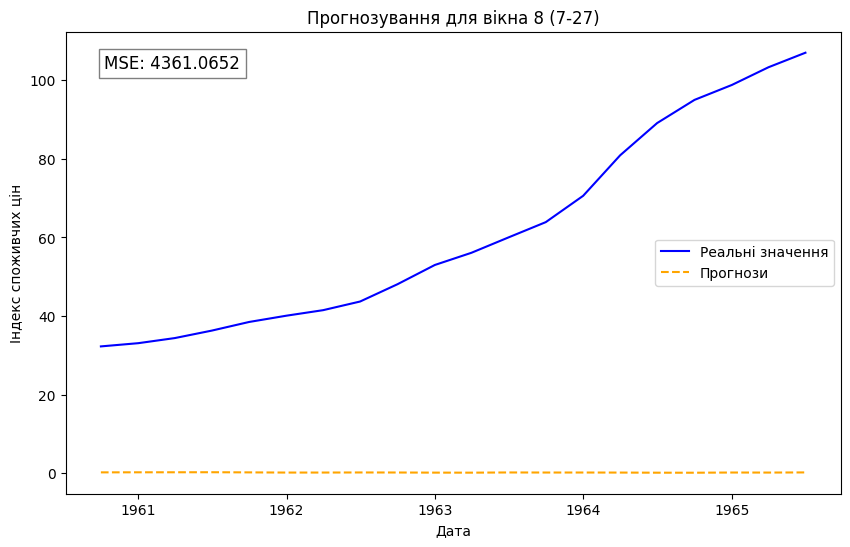

Training on window 9 (8-28)
Generation 0, Best Fitness: -4812.205867412029
Generation 1, Best Fitness: -4824.1842708028
Generation 2, Best Fitness: -4835.636255315873
Generation 3, Best Fitness: -4837.0329666575235
Generation 4, Best Fitness: -4837.757047372786
Generation 5, Best Fitness: -4838.391858467319
Generation 6, Best Fitness: -4834.77384372746
Generation 7, Best Fitness: -4838.043897872688
Generation 8, Best Fitness: -4838.043897872688
Generation 9, Best Fitness: -4838.043897872688
Generation 10, Best Fitness: -4838.3275558205505
Generation 11, Best Fitness: -4838.454855707515
Generation 12, Best Fitness: -4831.957586199245
Generation 13, Best Fitness: -4835.217916739713
Generation 14, Best Fitness: -4835.127067799655
Generation 15, Best Fitness: -4835.127067799655
Generation 16, Best Fitness: -4837.695169965233
Generation 17, Best Fitness: -4833.524297413747
Generation 18, Best Fitness: -4837.367802010159
Generation 19, Best Fitness: -4835.696180800299
Generation 20, Best Fit

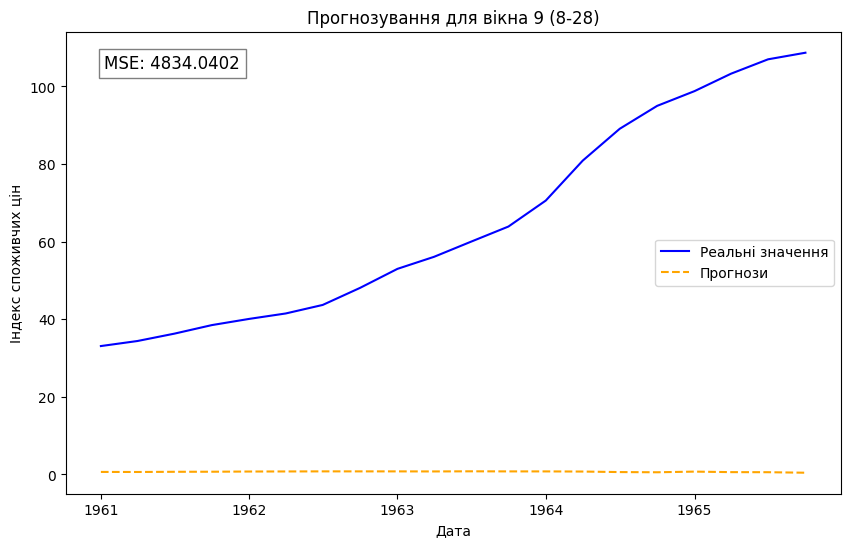

Training on window 10 (9-29)
Generation 0, Best Fitness: -5386.542579734605
Generation 1, Best Fitness: -5404.597645446659
Generation 2, Best Fitness: -5418.049765334182
Generation 3, Best Fitness: -5435.246486798249
Generation 4, Best Fitness: -5447.90243126191
Generation 5, Best Fitness: -5453.43952998442
Generation 6, Best Fitness: -5451.526952730416
Generation 7, Best Fitness: -5450.557964967395
Generation 8, Best Fitness: -5450.557964967395
Generation 9, Best Fitness: -5455.149085823446
Generation 10, Best Fitness: -5450.6536739956155
Generation 11, Best Fitness: -5451.259124356067
Generation 12, Best Fitness: -5455.100719260407
Generation 13, Best Fitness: -5455.716037978177
Generation 14, Best Fitness: -5448.949951238077
Generation 15, Best Fitness: -5457.190620730133
Generation 16, Best Fitness: -5457.37894938287
Generation 17, Best Fitness: -5455.267963101578
Generation 18, Best Fitness: -5456.469030400316
Generation 19, Best Fitness: -5456.545756440655
Generation 20, Best Fit

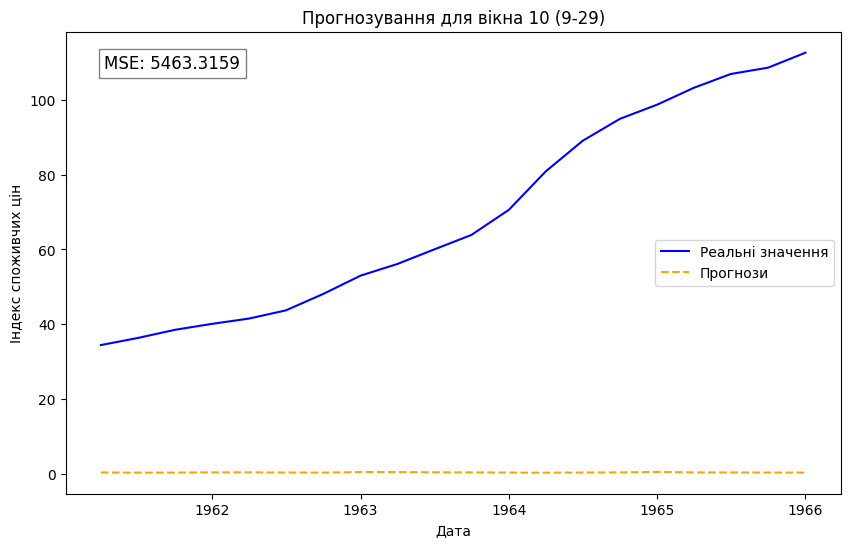

Training on window 11 (10-30)
Generation 0, Best Fitness: -6019.826398266148
Generation 1, Best Fitness: -6035.709409787323
Generation 2, Best Fitness: -6050.767726868284
Generation 3, Best Fitness: -6050.657401798397
Generation 4, Best Fitness: -6056.153723620117
Generation 5, Best Fitness: -6055.8990206497565
Generation 6, Best Fitness: -6057.8078648377295
Generation 7, Best Fitness: -6057.713863779949
Generation 8, Best Fitness: -6059.033721383784
Generation 9, Best Fitness: -6057.9298488440745
Generation 10, Best Fitness: -6052.744092498646
Generation 11, Best Fitness: -6056.436184089986
Generation 12, Best Fitness: -6055.97615530312
Generation 13, Best Fitness: -6058.286946869941
Generation 14, Best Fitness: -6053.400157052614
Generation 15, Best Fitness: -6057.016016770659
Generation 16, Best Fitness: -6059.727886349979
Generation 17, Best Fitness: -6059.727886349979
Generation 18, Best Fitness: -6055.319144322946
Generation 19, Best Fitness: -6054.825770835951
Generation 20, Bes

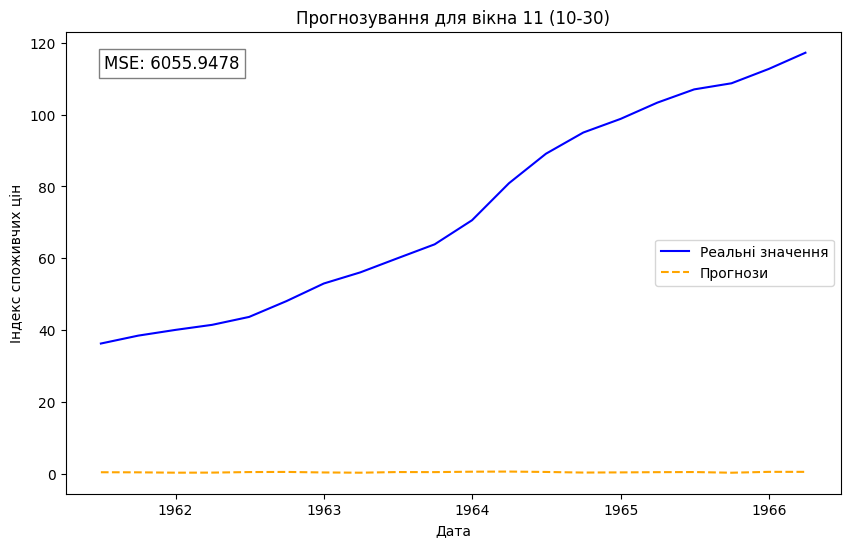

Training on window 12 (11-31)
Generation 0, Best Fitness: -6675.350069899398
Generation 1, Best Fitness: -6704.493282822793
Generation 2, Best Fitness: -6704.359467520648
Generation 3, Best Fitness: -6731.311684969395
Generation 4, Best Fitness: -6732.752603021605
Generation 5, Best Fitness: -6735.925573035372
Generation 6, Best Fitness: -6740.165177323225
Generation 7, Best Fitness: -6747.832581304874
Generation 8, Best Fitness: -6750.2635084823605
Generation 9, Best Fitness: -6749.976206792972
Generation 10, Best Fitness: -6752.31416685414
Generation 11, Best Fitness: -6752.56899219008
Generation 12, Best Fitness: -6752.758521782924
Generation 13, Best Fitness: -6753.185434556986
Generation 14, Best Fitness: -6748.210836677329
Generation 15, Best Fitness: -6751.06760550256
Generation 16, Best Fitness: -6747.905274746374
Generation 17, Best Fitness: -6743.570206458513
Generation 18, Best Fitness: -6747.214663252487
Generation 19, Best Fitness: -6744.306900990766
Generation 20, Best Fi

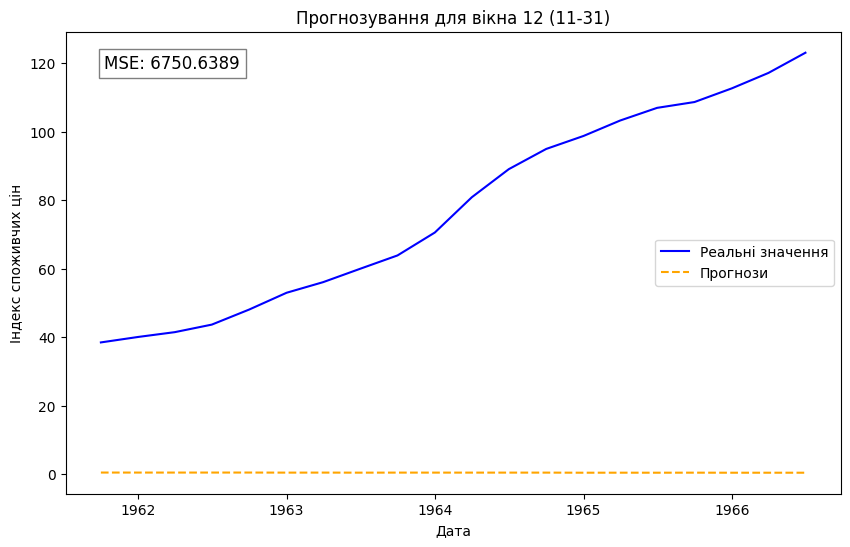

In [5]:
import matplotlib.pyplot as plt

def sliding_window_training(X, y, window_size=12, num_windows=10):
    n_samples = X.shape[0]
    
    for window in range(num_windows):  # Цикл для всіх вікон
        start_index = window
        end_index = start_index + window_size
        
        if end_index > n_samples:
            break  # Вихід, якщо виходимо за межі даних
        
        print(f"Training on window {window + 1} ({start_index}-{end_index})")
        
        X_window = X_scaled[start_index:end_index]
        y_window = y[start_index:end_index].reshape(-1, 1)

        # Навчання мережі на поточному вікні
        best_nn = train_genetic_algorithm(X_window, y_window, pop_size=20, num_generations=100, num_parents=10, mutation_rate=0.1)

        # Прогнозування 
        predictions = best_nn.forward(X_window)

        # Розрахунок DELTA та DELTA^2
        delta = predictions.flatten() - y_window.flatten()
        delta_squared = delta ** 2
        
        # Підготовка даних для таблиці
        results_df = pd.DataFrame({
            'Point': np.arange(window_size)[::-1],
            'IPC RO': y_window.flatten(),
            'IPC PO': predictions.flatten(),
            'DELTA': delta,
            'DELTA^2': delta_squared
        })
        
        # Обчислення TOTAL та MSE
        total_delta = delta.sum()
        total_delta_squared = delta_squared.sum()
        mse = np.mean(delta_squared)

        # Додавання підсумків до таблиці
        results_df.loc[len(results_df)] = ['TOTAL', '', total_delta, '', total_delta_squared]
        results_df.loc[len(results_df)] = ['MSE', '', '', '', mse]

        # Збереження результатів у Excel
        results_df.to_excel(f'full/sliding_window_results_window_{window + 1}.xlsx', index=False)

        # Візуалізація
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'][start_index:end_index], y_window, label='Реальні значення', color='blue')
        plt.plot(df['date'][start_index:end_index], predictions, label='Прогнози', linestyle='--', color='orange')
        plt.xlabel('Дата')
        plt.ylabel('Індекс споживчих цін')
        plt.title(f'Прогнозування для вікна {window + 1} ({start_index}-{end_index})')
        plt.legend()

        plt.text(0.05, 0.95, f'MSE: {mse:.4f}', transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        plt.savefig(f'full/window_{window + 1}_forecast.png')  # Зберігаємо графік
        plt.show()

sliding_window_training(X, y, window_size=20, num_windows=12)